In [1]:
import requests
request = requests.get("https://dataquestio.github.io/web-scraping.pages/simple.html")

after running our request we get a response obj.this obj has a status code which indicate if the page was downloaded successfully

In [2]:
request.status_code

404

we can print outthe html content of the page using the content properly.

b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\n    <meta http-equiv="Content-Security-Policy" content="default-src \'none\'; style-src \'unsafe-inline\'; img-src data:; connect-src \'self\'">\n    <title>Site not found &middot; GitHub Pages</title>\n    <style type="text/css" media="screen">\n      body {\n        background-color: #f1f1f1;\n        margin: 0;\n        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;\n      }\n\n      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }\n\n      a { color: #4183c4; text-decoration: none; }\n      a:hover { text-decoration: underline; }\n\n      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }\n      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }\n\n      ul { list-style: none; margin: 25px 
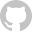
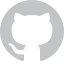

In [3]:
request.content

### Parsing a page with BeautifulSoup

we can use the BeautifulSoup liberary to parse this document and extract the text from the <p> tag.

['html',
 <html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
 <meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
 <title>Site not found · GitHub Pages</title>
 <style media="screen" type="text/css">
       body {
         background-color: #f1f1f1;
         margin: 0;
         font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
       }
 
       .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }
 
       a { color: #4183c4; text-decoration: none; }
       a:hover { text-decoration: underline; }
 
       h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
       p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }
 
       ul { list-style: none; margin: 25px 0; padding: 0; }
       li { display: 
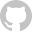
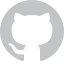

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(request.content)
list(soup.children)

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
  <title>
   Site not found · GitHub Pages
  </title>
  <style media="screen" type="text/css">
   body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: ta
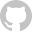
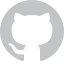

In [5]:
print(soup.prettify())

In [6]:
type(soup.children)

list_iterator

this tells us that there are 2 tags at the top level of the page- the initial <!DOCTYPE html>

In [7]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.Tag, bs4.element.NavigableString]

the tag object allows us to navigate through an HTML document.and extract other tags and text. you can now select the html tag and its children by taking the second item in the list

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
<title>Site not found · GitHub Pages</title>
<style media="screen" type="text/css">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: table-cell; font-weight: bold; 
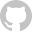
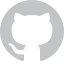

In [8]:
html = list(soup.children)[1]
html

Each item in the list returned by the children property is also a BeautifulSoup object so we can also call the children on html

now we can can find the children inside the html tag:

['\n',
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
 <meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
 <title>Site not found · GitHub Pages</title>
 <style media="screen" type="text/css">
       body {
         background-color: #f1f1f1;
         margin: 0;
         font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
       }
 
       .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }
 
       a { color: #4183c4; text-decoration: none; }
       a:hover { text-decoration: underline; }
 
       h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
       p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }
 
       ul { list-style: none; margin: 25px 0; padding: 0; }
       li { display: table-cell
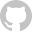
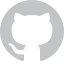

In [9]:
list(html.children)

['\n',
 <div class="container">
 <h1>404</h1>
 <p><strong>There isn't a GitHub Pages site here.</strong></p>
 <p>
         If you're trying to publish one,
         <a href="https://help.github.com/pages/">read the full documentation</a>
         to learn how to set up <strong>GitHub Pages</strong>
         for your repository, organization, or user account.
       </p>
 <div id="suggestions">
 <a href="https://githubstatus.com">GitHub Status</a> —
         <a href="https://twitter.com/githubstatus">@githubstatus</a>
 </div>
 <a class="logo logo-img-1x" href="/">
 
 </a>
 <a class="logo logo-img-2x" href="/">
 
 </a>
 </div>,
 '\n']
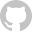
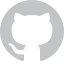

In [10]:
body = list(html.children)[3]
body

list(body.children)

we can isolate the p tag:

<div class="container">
<h1>404</h1>
<p><strong>There isn't a GitHub Pages site here.</strong></p>
<p>
        If you're trying to publish one,
        <a href="https://help.github.com/pages/">read the full documentation</a>
        to learn how to set up <strong>GitHub Pages</strong>
        for your repository, organization, or user account.
      </p>
<div id="suggestions">
<a href="https://githubstatus.com">GitHub Status</a> —
        <a href="https://twitter.com/githubstatus">@githubstatus</a>
</div>
<a class="logo logo-img-1x" href="/">

</a>
<a class="logo logo-img-2x" href="/">

</a>
</div>
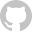
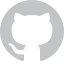

In [11]:
p = list(body.children)[1]
p

after isolation u can use the get_text method to extract all of the text inside the tag:

In [12]:
p.get_text()

"\n404\nThere isn't a GitHub Pages site here.\n\n        If you're trying to publish one,\n        read the full documentation\n        to learn how to set up GitHub Pages\n        for your repository, organization, or user account.\n      \n\nGitHub Status —\n        @githubstatus\n\n\n\n\n\n\n\n"

Finding all  instances of a tag at once

if we want to extract a single tag, we can use the find_all method which will find all the instances of a tag on a p tag

In [13]:
soup = BeautifulSoup(request.content)
soup.find_all('p')

[<p><strong>There isn't a GitHub Pages site here.</strong></p>,
 <p>
         If you're trying to publish one,
         <a href="https://help.github.com/pages/">read the full documentation</a>
         to learn how to set up <strong>GitHub Pages</strong>
         for your repository, organization, or user account.
       </p>]

the find_all returns a list so we ll have a loope through, or use list indexing, it to extract text:

In [14]:
soup.find_all('p')[0].get_text()

"There isn't a GitHub Pages site here."

In [15]:
soup.find('p')

<p><strong>There isn't a GitHub Pages site here.</strong></p>

Searching for tags by class and id

In [16]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content)
soup

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

In [17]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In [18]:
soup.find_all(class_='outer-text')[0]
soup.find_all(class_='outer-text')[0].get_text()

'\n\n                First outer paragraph.\n            \n'

In [19]:
soup.find_all(id='first')[0].get_text()

'\n                First paragraph.\n            '

Using CSS Selection

p a - finds all a tags inside of a p tag 
body p a - finds all a tags inside of a p tag inside of a body tag
html body - finds all body tags inside od an html tag
p.outer-text - finds allm p tags with a class of outer-text
p#first - finds all p tags with an id of first
body p.outer-text - finds any p tag with a class of outer-text inside of the body tag

In [20]:
soup.select("p#second")
soup.select('p b')
soup.select_one('p b')

<b>
                First outer paragraph.
            </b>